In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#using the stored files and getting the data from them

en_train_df = pd.read_csv('/content/drive/MyDrive/datasets/en_train2.csv')
hn_train_df = pd.read_csv('/content/drive/MyDrive/datasets/hn_train2.csv')
en_val_df = pd.read_csv('/content/drive/MyDrive/datasets/en_val2.csv')

en_train = [[v for v in row if not pd.isna(v)] for row in en_train_df.values.tolist()]
hn_train = [[v for v in row if not pd.isna(v)] for row in hn_train_df.values.tolist()]
en_val = [[v for v in row if not pd.isna(v)] for row in en_val_df.values.tolist()]

<ipython-input-20-081fd30bb4b2>:1: DtypeWarning: Columns (73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  en_train_df = pd.read_csv('/content/drive/MyDrive/datasets/en_train2.csv')
<ipython-input-20-081fd30bb4b2>:2: DtypeWarning: Columns (57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  hn_train_df = pd.read_csv('/content/drive/MyDrive/datasets/hn_train2.csv')
<ipython-input-20-081fd30bb4b2>:3: DtypeWarning: Columns (59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166

In [ ]:
print(len(en_train))
print(len(hn_train))
print(len(en_val))

68849
68849
9836


In [ ]:
print(en_train[0])
print(hn_train[0])

['do', 'not', 'forget', 'to', 'visit', 'the', 'point', 'where', 'the', 'narmada', 'flowing', 'through', 'the', 'marble', 'rocks', 'interchanges', 'its', 'calmness', 'and', 'serenity', 'into', 'insouciance']
['এই', 'জায়গাগুলো', 'দেখতে', 'ভুলো', 'না', 'যেখানে', 'নর্মদা', 'নদী', 'মার্বেল', 'পাথরের', 'পাহাড়ের', 'মধ্য', 'দিয়ে', 'প্রবাহিত', 'হচ্ছে', 'এবং', 'নিজের', 'শান্তি', 'ও', 'সৌন্দর্যকে', 'অনাসক্তিতে', 'পরিণত', 'করছে', '।']


In [ ]:
en_dict = {}
hn_dict = {}

# Creating the dictionaries of the training datasets

def add(dict, word):
  if word not in dict:
    dict[word] = len(dict)
  return

extras = ['<EOS>', '<SOS>', '<PAD>']

for word in extras:
  add(en_dict, word)
  add(hn_dict, word)

for sentence in en_train:
  for word in sentence:
    add(en_dict, word)

for sentence in hn_train:
  for word in sentence:
    add(hn_dict, word)

# for sentence in en_val:
#   for word in sentence:
#     add(en_dict, word)

In [ ]:
print(len(en_dict))
print(len(hn_dict))

53817
99392


In [ ]:
# Computing the average sizes of the sentences

avgsize = 0
for x in en_train:
  avgsize += len(x)
avgsize /= len(hn_train)
print(avgsize)

16.428691774753446


In [ ]:
avgsize = 0
for x in hn_train:
  avgsize += len(x)
avgsize /= len(hn_train)
print(avgsize)

14.235718746822757


In [ ]:
# Finding the most frequent words
from collections import Counter
def vocabulary(tokens):
    from collections import Counter
    return Counter(token for sentence in tokens for token in sentence)

en_vocab2 = vocabulary(en_train)
hn_vocab2 = vocabulary(hn_train)
print(f"{en_vocab2.most_common(10)}")
print(f"{hn_vocab2.most_common(10)}")

[('the', 77165), ('of', 46498), ('and', 30790), ('in', 30630), (' ', 28732), ('to', 23074), ('is', 22963), ('a', 19962), ('for', 9457), ('are', 8713)]
[('।', 37299), ('৷', 17593), ('এবং', 16592), ('করে', 10113), ('এই', 9125), ('থেকে', 8769), ('জন্য', 8206), ('করা', 7559), ('একটি', 7313), ('ও', 7171)]


In [ ]:
pip install wordcloud

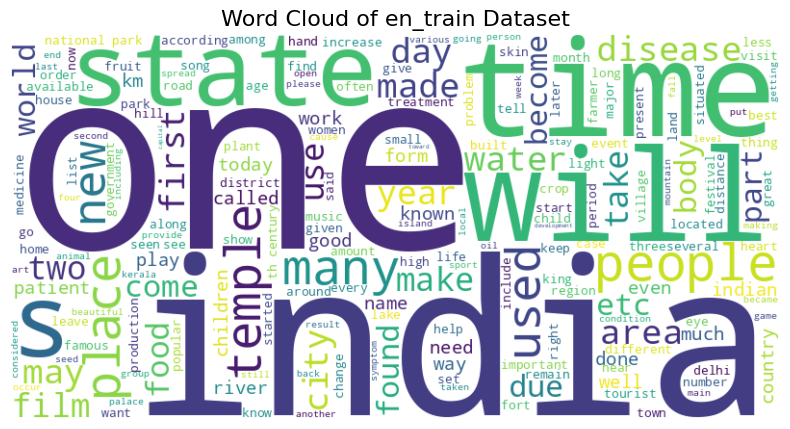

In [ ]:
#creating word clouds

from wordcloud import WordCloud
all_words = [token for sentence in en_train for token in sentence]
text = " ".join(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of en_train Dataset", fontsize=16)
plt.show()

In [ ]:
for sentence in en_val:
  for word in sentence:
    add(en_dict, word)

In [ ]:
print(len(en_dict))

57487
